In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df_sampled = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

property = 'Wind_pre_7'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: -1.0; max value: 25.7


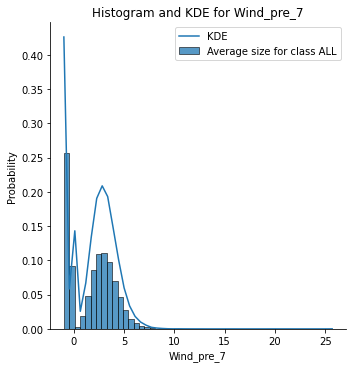

In [2]:
x = np.linspace(min_amount, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 50)

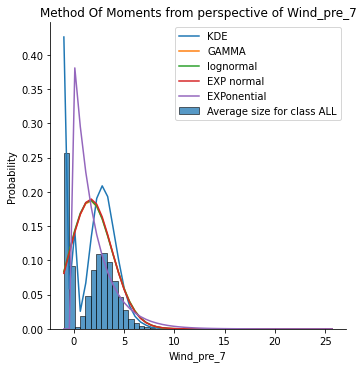

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7468549941699344, pvalue=2.665233430723723e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=8.205383765999178, pvalue=4.081102122910352e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7473819845835743, pvalue=2.3698454409127594e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=8.225805333256387, pvalue=4.297895372928906e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7499468519859243, pvalue=1.334064184164957e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=8.290487509346484, pvalue=5.0551451913349865e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7507695698516196, pvalue=1.1083794769556592e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=9.281058244177714, pvalue=4.576591328131485e-10)

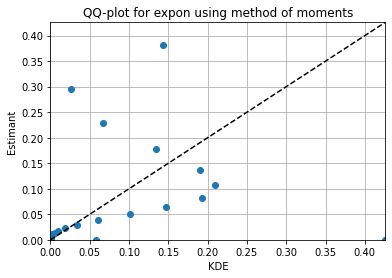

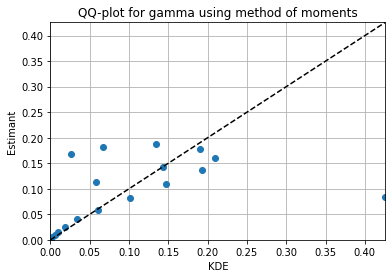

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

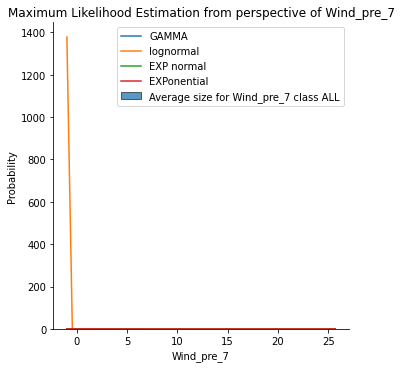

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7435134568712113, pvalue=5.587274584178036e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=8.131559353439036, pvalue=3.37728733867948e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.8528179403180678, pvalue=6.109203507033961e-42), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=10.379323260116449, pvalue=6.737976843140814e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7502411244563334, pvalue=1.2485683741726065e-29), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=8.285563524069875, pvalue=4.993505609007798e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.628541534279319, pvalue=1.2127339260734556e-19), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.626606956264935, pvalue=4.606983683430599e-10)


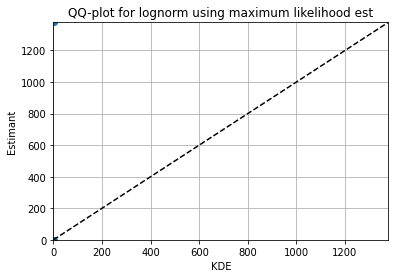

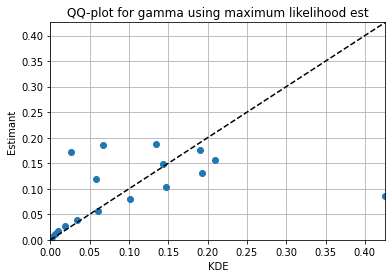

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[0.00665265 1.28739116 2.74851805]
[-1.00007422  4.10140208  2.13970755]


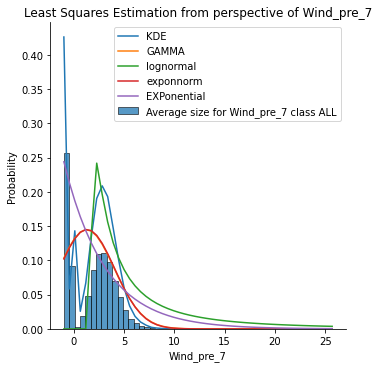

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.6333120777382099, pvalue=5.6520144538231e-20), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.522873269716191, pvalue=3.24173909937997e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.6350889140529601, pvalue=4.2427361789428326e-20), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.55284085361776, pvalue=3.593181308048088e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.7247333808556419, pvalue=3.105679552217884e-27), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=7.726945929191388, pvalue=1.2196413878839962e-09)


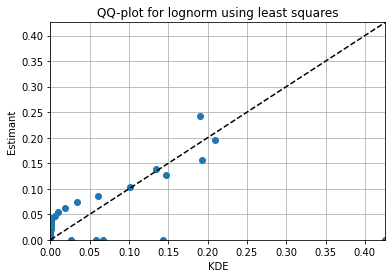

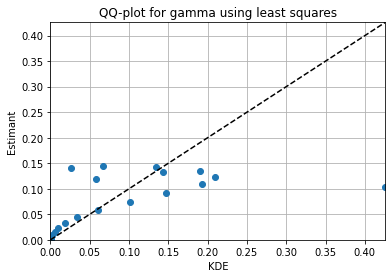

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

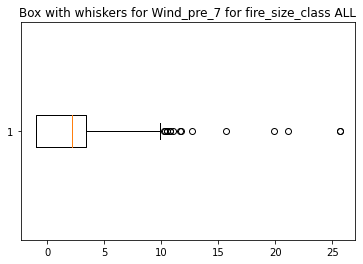

In [6]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()